# Urban vs. rural regions
aim: classify wards into rural or urban

definition: population size? number households, individuals?
+ rural
+ urban



In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
# import data
df = pd.read_csv("/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/data/Train.csv")

In [4]:
# check out data
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [9]:
df.total_individuals.describe()

count     2822.000000
mean     12869.130053
std       9696.690518
min        402.000000
25%       7071.205695
50%       9366.989680
75%      14241.233015
max      91716.746370
Name: total_individuals, dtype: float64

<AxesSubplot:>

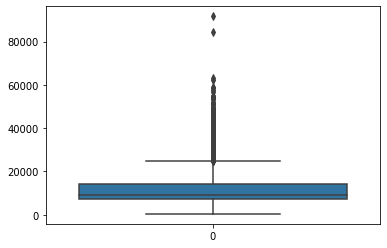

In [15]:
sns.boxplot(data=df.total_individuals)

In [108]:
#create a dataframe with only geodata

geo_df = df[["ward", "total_individuals", "target", "ADM4_PCODE", "lat", "lon"]]
geo_df.tail()

,ward,total_individuals,target,ADM4_PCODE,lat,lon
2817,34503001: Ward 1,11551.56486,6.393480,ZA3453001,-27.675590,23.057920
2818,34503002: Ward 2,7908.90411,15.668000,ZA3453002,-27.591408,22.907161
2819,34503003: Ward 3,6242.37527,13.238795,ZA3453003,-27.952550,22.749698
2820,34503004: Ward 4,8014.73089,17.639523,ZA3453004,-27.913875,22.755314
2821,34503005: Ward 5,7899.36498,12.457680,ZA3453005,-27.741804,22.856933


In [109]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_individuals  2822 non-null   float64
 2   target             2822 non-null   float64
 3   ADM4_PCODE         2822 non-null   object 
 4   lat                2822 non-null   float64
 5   lon                2822 non-null   float64
dtypes: float64(4), object(2)
memory usage: 132.4+ KB


## Data from south african administrative boundaries

from the Information Technology Outreach Services (ITOS) [link](https://data.humdata.org/dataset/south-africa-admin-level-1-boundaries)



In [110]:
admin4_df = pd.read_csv("/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/data/zaf_adminboundaries_tabulardata - Admin4.csv", decimal=",")

In [111]:
admin4_df.head()

,OBJECTID *,Shape *,admin4Name_en,admin4Pcode,admin4RefName,admin4AltName1_en,admin4AltName2_en,admin3Name_en,admin3Pcode,admin2Name_en,...,admin0Name_en,admin0Pcode,date,validOn,validTo,ADM1_ID,ADM2_ID,ADM3_ID,Shape_Length,Shape_Area
0,1,Polygon,1,ZA9344001,<Null>,<Null>,<Null>,Makhado,ZA9344,Vhembe,...,South Africa,ZA,12/27/2018,11/9/2020,<Null>,LIM,DC34,LIM344,0.253589,0.001676
1,2,Polygon,2,ZA9344002,<Null>,<Null>,<Null>,Makhado,ZA9344,Vhembe,...,South Africa,ZA,12/27/2018,11/9/2020,<Null>,LIM,DC34,LIM344,0.159002,0.000912
2,3,Polygon,3,ZA9344003,<Null>,<Null>,<Null>,Makhado,ZA9344,Vhembe,...,South Africa,ZA,12/27/2018,11/9/2020,<Null>,LIM,DC34,LIM344,0.374324,0.003885
3,4,Polygon,4,ZA9344004,<Null>,<Null>,<Null>,Makhado,ZA9344,Vhembe,...,South Africa,ZA,12/27/2018,11/9/2020,<Null>,LIM,DC34,LIM344,0.206612,0.001345
4,5,Polygon,5,ZA9344005,<Null>,<Null>,<Null>,Makhado,ZA9344,Vhembe,...,South Africa,ZA,12/27/2018,11/9/2020,<Null>,LIM,DC34,LIM344,0.581000,0.009428


## Data cleaning

In [113]:
#make a new dataframe with only needed informations: admin4Pcode and Shape_Area
ward_size = admin4_df[["admin4Pcode", "Shape_Area"]]
ward_size.head()

,admin4Pcode,Shape_Area
0,ZA9344001,0.001676
1,ZA9344002,0.000912
2,ZA9344003,0.003885
3,ZA9344004,0.001345
4,ZA9344005,0.009428


In [114]:
ward_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admin4Pcode  4392 non-null   object 
 1   Shape_Area   4392 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.8+ KB


In [115]:
# Convert admin4Pcode to string
ward_size["admin4Pcode"] = ward_size["admin4Pcode"].astype("string")


/var/folders/65/r_18y6k51qn22_3r6nq8rh280000gn/T/ipykernel_23222/2571442738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ward_size["admin4Pcode"] = ward_size["admin4Pcode"].astype("string")


In [117]:
# rename admin4Pcode to ADM4_PCODE so the name is equal in both df
ward_size.rename({"admin4Pcode" : "ADM4_PCODE"}, axis=1, inplace=True)

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [121]:
# merge geo_df and ward_size to one table on the zip code
geo_df = geo_df.merge(ward_size, on="ADM4_PCODE", how="inner",)

In [122]:
# check out new merged table
geo_df.head()

,ward,total_individuals,target,ADM4_PCODE,lat,lon,Shape_Area
0,41601001: Ward 1,5888.20750,16.773757,ZA4161001,-29.682270,24.734743,0.280699
1,41601002: Ward 2,6735.33812,21.496661,ZA4161002,-29.119311,24.757737,0.000502
2,41601003: Ward 3,7273.04995,10.931425,ZA4161003,-29.142276,25.094093,0.457864
3,41601004: Ward 4,5734.49046,23.119257,ZA4161004,-29.372052,24.942867,0.016026
4,41601005: Ward 5,6657.23835,13.652252,ZA4161005,-29.409381,25.290165,0.156763


### Shape Area
shape_area was in the wrong dimension (units were not given)

I used wazimap to confirm my calculations:
https://wazimap.co.za/profiles/ward-41601002-letsemeng-ward-2-41601002/

In [139]:
# calculation of the population density : number of individuals per km2
geo_df["pop_density"] = geo_df.total_individuals / (geo_df.Shape_Area*10000)

In [141]:
geo_df.head()

,ward,total_individuals,target,ADM4_PCODE,lat,lon,Shape_Area,pop_density
0,41601001: Ward 1,5888.20750,16.773757,ZA4161001,-29.682270,24.734743,0.280699,2.097695
1,41601002: Ward 2,6735.33812,21.496661,ZA4161002,-29.119311,24.757737,0.000502,1341.700821
2,41601003: Ward 3,7273.04995,10.931425,ZA4161003,-29.142276,25.094093,0.457864,1.588474
3,41601004: Ward 4,5734.49046,23.119257,ZA4161004,-29.372052,24.942867,0.016026,35.782419
4,41601005: Ward 5,6657.23835,13.652252,ZA4161005,-29.409381,25.290165,0.156763,4.246690


## Classification of urban and rural places

According to the definition of Statistics South Africa, Census 2001 [link](http://www.statssa.gov.za/census/census_2001/urban_rural/urbanrural.pdf):

urban is defined:
+ local population size >= 1000
+ population density >= 500

In [157]:
# query on urban type
geo_df.query("pop_density >= 500 & total_individuals >= 1000")

,ward,total_individuals,target,ADM4_PCODE,lat,lon,Shape_Area,pop_density
1,41601002: Ward 2,6735.33812,21.496661,ZA4161002,-29.119311,24.757737,0.000502,1341.700821
14,41603001: Ward 1,6181.22961,33.262138,ZA4163001,-30.285250,27.109811,0.000282,2191.925394
24,41801005: Ward 5,10103.96634,30.587248,ZA4181005,-28.533601,27.001705,0.000069,14643.429478
26,41801007: Ward 7,6603.77724,31.175407,ZA4181007,-28.407077,26.694692,0.000340,1942.287424
27,41801008: Ward 8,4814.02526,30.568172,ZA4181008,-28.427081,26.696700,0.000221,2178.291973
...,...,...,...,...,...,...,...,...
2784,30904005: Ward 5,9371.04308,16.581050,ZA3094005,-27.740133,24.803855,0.000155,6045.834245
2786,30904007: Ward 7,9342.26331,23.720088,ZA3094007,-27.914017,24.816223,0.000059,15834.344593
2806,34502003: Ward 3,9996.25986,20.457931,ZA3452003,-27.399432,23.487940,0.001959,510.273602
2817,34503001: Ward 1,11551.56486,6.393480,ZA3453001,-27.675590,23.057920,0.001749,660.466830


In [169]:
#create new column based on threshold, to simplify only pop density as threshold was chosen 

conditions = [
    geo_df['pop_density'] >= 500, #urban
    geo_df['pop_density'] < 500  #rural
]

choices = ["urban","rural"]

geo_df["ward_type"] = np.select(conditions, choices, default="NA")

In [170]:
geo_df.head(20)

,ward,total_individuals,target,ADM4_PCODE,lat,lon,Shape_Area,pop_density,ward_type
0,41601001: Ward 1,5888.20750,16.773757,ZA4161001,-29.682270,24.734743,0.280699,2.097695,rural
1,41601002: Ward 2,6735.33812,21.496661,ZA4161002,-29.119311,24.757737,0.000502,1341.700821,urban
2,41601003: Ward 3,7273.04995,10.931425,ZA4161003,-29.142276,25.094093,0.457864,1.588474,rural
3,41601004: Ward 4,5734.49046,23.119257,ZA4161004,-29.372052,24.942867,0.016026,35.782419,rural
4,41601005: Ward 5,6657.23835,13.652252,ZA4161005,-29.409381,25.290165,0.156763,4.246690,rural
5,41601006: Ward 6,6340.05782,25.249880,ZA4161006,-29.126870,25.410360,0.001344,471.730493,rural
6,41602001: Ward 1,6230.77491,19.984585,ZA4162001,-29.640860,26.091774,0.159334,3.910512,rural
7,41602002: Ward 2,6873.93123,16.511081,ZA4162002,-30.029163,25.917164,0.335469,2.049051,rural
8,41602003: Ward 3,6736.49015,25.962117,ZA4162003,-30.462176,26.133170,0.046797,14.395132,rural
9,41602004: Ward 4,5682.10110,21.744166,ZA4162004,-30.420421,25.351630,0.119946,4.737216,rural


In [171]:
geo_df.groupby(by="ward_type").count()

,ward,total_individuals,target,ADM4_PCODE,lat,lon,Shape_Area,pop_density
ward_type,,,,,,,,
rural,1481,1481,1481,1481,1481,1481,1481,1481
urban,1341,1341,1341,1341,1341,1341,1341,1341


In [172]:
geo_df.groupby(by="ward_type").median()

,total_individuals,target,lat,lon,Shape_Area,pop_density
ward_type,,,,,,
rural,8320.37474,29.568522,-26.895110,29.609640,0.010303,85.282813
urban,12258.73058,20.608726,-26.413515,28.242247,0.000463,2854.082311


<AxesSubplot:xlabel='ward_type', ylabel='target'>

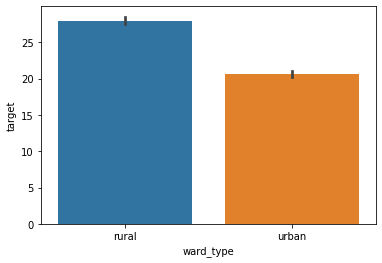

In [176]:
sns.barplot(data=geo_df, y="target", x="ward_type")

In [178]:
#convert ne dataframe to csv and put it into the data folder
geo_df.to_csv("data/geo_df.csv")